
  ![picture](https://drive.google.com/uc?export=view&id=1Ud_aBVIhTV7QqjgO_gRueqs9dzokZOU-)


# **Context**
**PlayerUnknown’s Battlegrounds (PUBG) is a battle royale survival game with the goal of being the last player standing. Up to 100 players are dropped onto an island empty-handed with a variety of game modes that can allow squads of up to 4 people. In the game, a player can find and use a variety of weapons, items, and vehicles. Players must also avoid the shrinking “circle”, which pushes players closer together on the map**.

# **Motivation**
**With the growing prevalence of competitive eSports, there is a need for rich user data and analysis for improving skill. By exploring the data, we found valuable insights into the strategies and metrics that yield the best player performance**

# Goal: 
**Detailed univariate and bivariate analysis with proper observations.**

In [3]:
from google.colab import drive
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PUBG EDA/data.csv')

In [66]:
data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


# Know Your Data 
In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.
You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 players per group


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

**We can see that the data types are not in the wrong format (no strings represented as integers or integers as characters) we can also see that the data frame takes a little less than 255Mb of memory which is expected as the data contains more than 1 million observation.**

In [68]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1111742.0,2.224362e+06,1.283879e+06,6.0,1112440.25,2.223772e+06,3.337954e+06,4446964.0
assists,1111742.0,2.336738e-01,5.894028e-01,0.0,0.00,0.000000e+00,0.000000e+00,17.0
boosts,1111742.0,1.106655e+00,1.716050e+00,0.0,0.00,0.000000e+00,2.000000e+00,24.0
damageDealt,1111742.0,1.307364e+02,1.711755e+02,0.0,0.00,8.411000e+01,1.859000e+02,5990.0
DBNOs,1111742.0,6.573612e-01,1.146023e+00,0.0,0.00,0.000000e+00,1.000000e+00,35.0
headshotKills,1111742.0,2.266488e-01,6.033356e-01,0.0,0.00,0.000000e+00,0.000000e+00,64.0
heals,1111742.0,1.370348e+00,2.683819e+00,0.0,0.00,0.000000e+00,2.000000e+00,73.0
killPlace,1111742.0,4.759562e+01,2.747025e+01,1.0,24.00,4.700000e+01,7.100000e+01,100.0
killPoints,1111742.0,5.044301e+02,6.274006e+02,0.0,0.00,0.000000e+00,1.171000e+03,2170.0
kills,1111742.0,9.255097e-01,1.562216e+00,0.0,0.00,0.000000e+00,1.000000e+00,72.0


**We observe that some columns have outliers so later we need to decide how we’ll deal with them( drop, normalize, or leave them as they can contain important information)**

In [6]:
data.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

The DataFrame (data) has 1111742 rows and 29 columns.
Before starting first let's acquire some information about each column.
<ul>
<li>DBNOs - Number of enemy players knocked.
<li>assists - Number of enemy players this player damaged that were killed by teammates.
<li>boosts - Number of boost items used.
<li>damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
<li>headshotKills - Number of enemy players killed with headshots.
heals - Number of healing items used.
<li>Id - Player’s Id
<li>killPlace - Ranking in match of number of enemy players killed.
<li>killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
<li>killStreaks - Max number of enemy players killed in a short amount of time.
<li>kills - Number of enemy players killed.
<li>longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
<li>matchDuration - Duration of match in seconds.
<li>matchId - ID to identify match. There are no matches that are in both the training and testing set.
<li>matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
<li>rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
<li>revives - Number of times this player revived teammates.
<li>rideDistance - Total distance traveled in vehicles measured in meters.
<li>roadKills - Number of kills while in a vehicle.
<li>swimDistance - Total distance traveled by swimming measured in meters.
<li>teamKills - Number of times this player killed a teammate.
<li>vehicleDestroys - Number of vehicles destroyed.
<li>walkDistance - Total distance traveled on foot measured in meters.
<li>weaponsAcquired - Number of weapons picked up.
<li>winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
<li>groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
<li>numGroups - Number of groups we have data for in the match.
<li>maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
<li>winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# Univariate Analysis

In the univariate data exploration, based on our my game experience, I am more interested and consider the more important variables as the number of kills, the damage caused, the walking distance, the number of guns picked up by the player, and the number of Number of rescue items. We will conduct exploratory research on these variables in the data set to understand the distribution and characteristics of the variables. We believe that these factors have a greater impact on whether a game can achieve a higher ranking, of course, we will eventually verify our conjecture through correlation

## **Match Type**

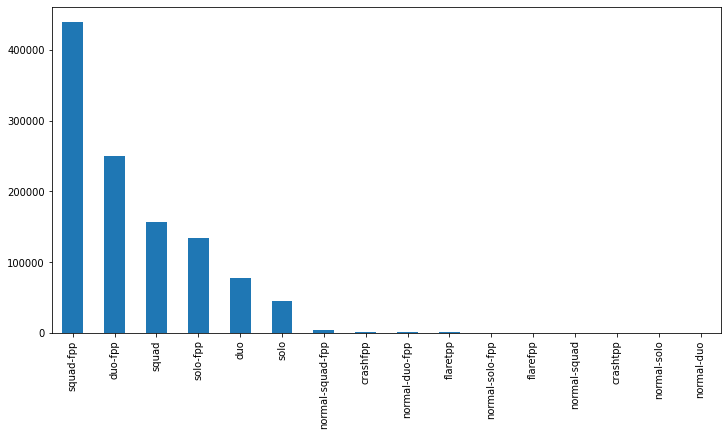

In [7]:
plt.figure(figsize=(12,6))

data['matchType'].value_counts().plot.bar()

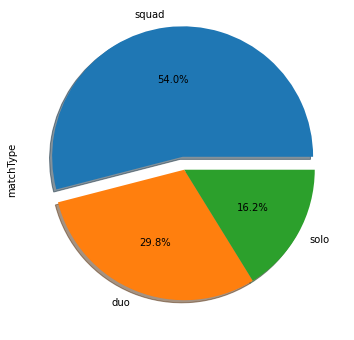

In [8]:
df = data.copy() #df is a copy of data to avoid modifying the value of data

mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'

df["matchType"] = df['matchType'].apply(mapper)



plt.figure(figsize=(12,6))
df["matchType"].value_counts().plot.pie(autopct="%.1f%%", explode=[0.1,0.0,0.0],shadow=True);

**The dataset contains sixteen different game modes, but all of them are variations of the core three types: squad, duo, solo. As a result, we mapped the sixteen game modes to the core three**

<li>Solo - One can play alone (solo,solo-fpp,normal-solo,normal-solo-fpp)
<li>Duo - Play with a friend (duo,duo-fpp,normal-duo,normal-duo-fpp,crashfpp,crashtpp)
<li>Squad - Play with 4 friends (squad,squad-fpp,normal-squad,normal-squad-fpp,flarefpp,flaretpp)

**Most Of the players Prefer to Play In Squad Mode**

## **Kills**

In [9]:
#average_killers indicates the average number of kills
average_killers=data['kills'].mean() 
#most_killer_max represents the 0.99 quantile of the number of kills, which means that 99% of the data is less than this number
most_killer_max=data['kills'].quantile(0.99)
#max_killers represents the largest number of kills in the data (this data is due to our interest)
max_killers=data['kills'].max() 
#Output it
print("The average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever recorded is {}.".format(average_killers,most_killer_max, max_killers))


The average person kills 0.9255 players, 99% of people have 7.0 kills or less, while the most kills ever recorded is 72.


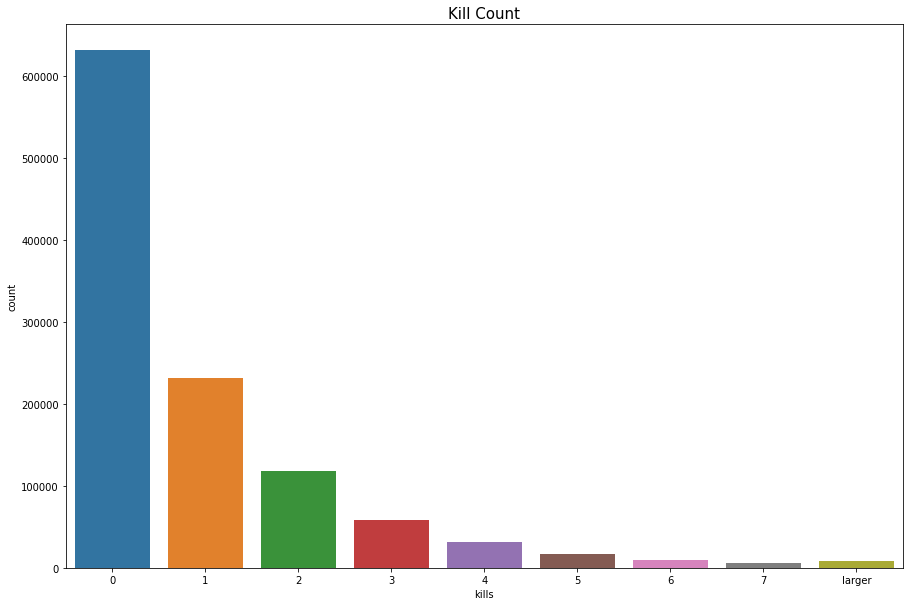

In [10]:
#The number of kills greater than 7 is attributed to larger
df.loc[df['kills'] > df['kills'].quantile(0.99)] = 'larger'
#Drawing, take kills as the abscissa, and the number of df as the ordinate
plt.figure(figsize=(15,10))
sns.countplot(df['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show();

## **Damage Caused**

In [11]:
#no_kill_success_nums indicates the number of people who did not kill but succeeded in eating chicken
no_kill_success_nums=len(data[data['winPlacePerc']==1])
#no_kill_success_rate indicates the probability of successfully eating chicken without killing
no_kill_success_rate=no_kill_success_nums/len(data)
#Output
print("{} players ({:.4f}%) have won without a single kill!".format(no_kill_success_nums,100*no_kill_success_rate))


31853 players (2.8651%) have won without a single kill!


In [12]:
df1 = data[data['damageDealt'] == 0].copy()
#no_damage_success_nums indicates the number of people who have 0 damage but succeeded in eating chicken
no_damage_success_nums=len(df1[df1['winPlacePerc']==1])
#no_damage_success_rate indicates the probability of having 0 damage but successfully eating chicken
no_damage_success_rate=no_damage_success_nums/len(data)
#Output
print("{} players ({:.4f}%) have won without dealing damage!".format(no_damage_success_nums, 100*no_damage_success_rate))

1199 players (0.1078%) have won without dealing damage!


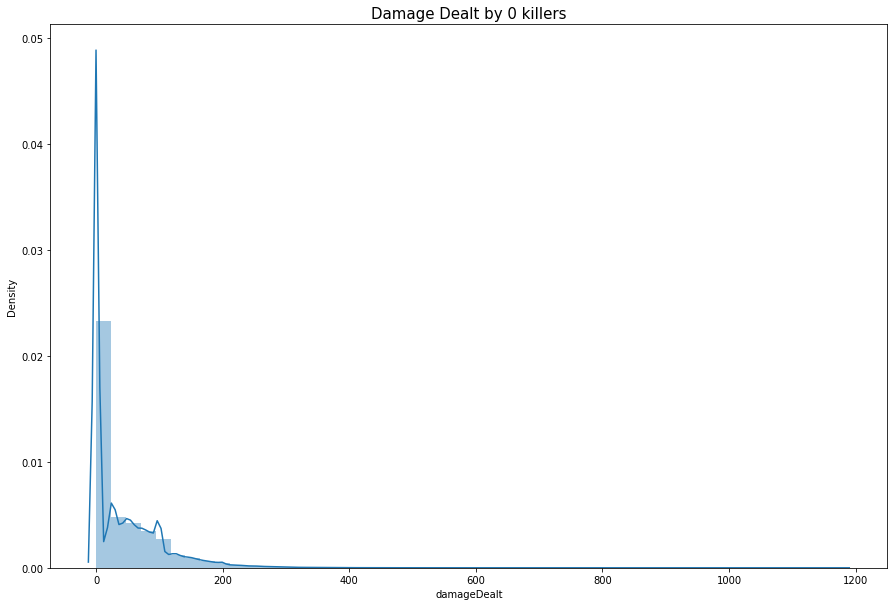

In [13]:
df3 = data.copy()
df3 = df3[df3['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(df3['damageDealt'])
plt.show()

In [14]:
len(data[(data["weaponsAcquired"] == 0) & (data.damageDealt == 0) & (data.kills == 0)])

49331

<ul>
<li>Most of them couldn't even do damage.
<li>16% of those who deal zero damage didn't even find a weapon, which means they were most likely killed at the beginning of the game.

## **Walking distance**

In [15]:
print ("The average walking distance is: {:.0f}".format(data['walkDistance'].mean()))
print ("99% of walking distances are less than this value:",data['walkDistance'].quantile(0.99))
print ("The largest walking distance in the dataset:",data['walkDistance'].max())

The average walking distance is: 1153
99% of walking distances are less than this value: 4393.0
The largest walking distance in the dataset: 13960.0


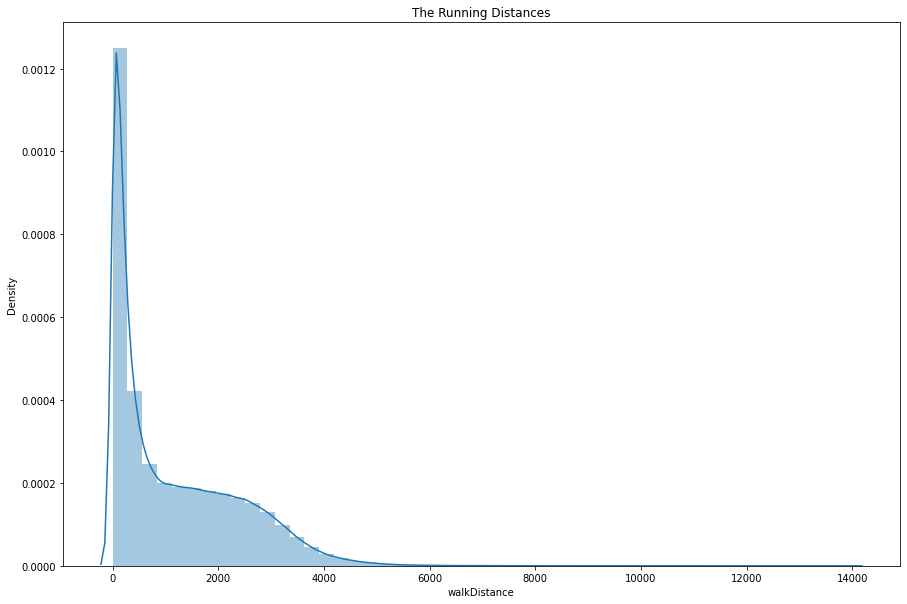

In [16]:
df3 = data[data['walkDistance'] < data['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("The Running Distances")
sns.distplot(data['walkDistance'])   #distplot histogram
plt.show()

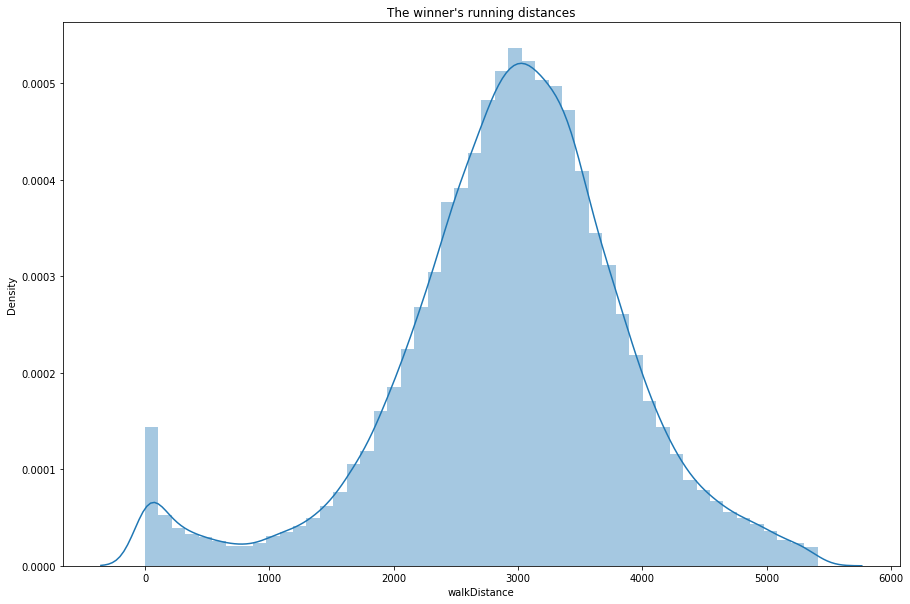

In [17]:
#Here we check the walking distance of the final winner
winner_data=data[data['winPlacePerc'] == 1].copy()
winner_data = winner_data[winner_data['walkDistance'] < winner_data['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("The winner's running distances")
sns.distplot(winner_data['walkDistance'])   #distplot histogram
plt.show()

**Final winner usually walks around 3000m, which is a higher walking distance**

## **Number of guns picked up by players**

In [18]:
print ("The average number of guns picked up is: {:.0f}".format(data['weaponsAcquired'].mean()))
print ("0.99 quantile of the number of guns picked up:",data['weaponsAcquired'].quantile(0.99))
print ("The largest number of guns picked up in the data set:",data['weaponsAcquired'].max())

The average number of guns picked up is: 4
0.99 quantile of the number of guns picked up: 10.0
The largest number of guns picked up in the data set: 177


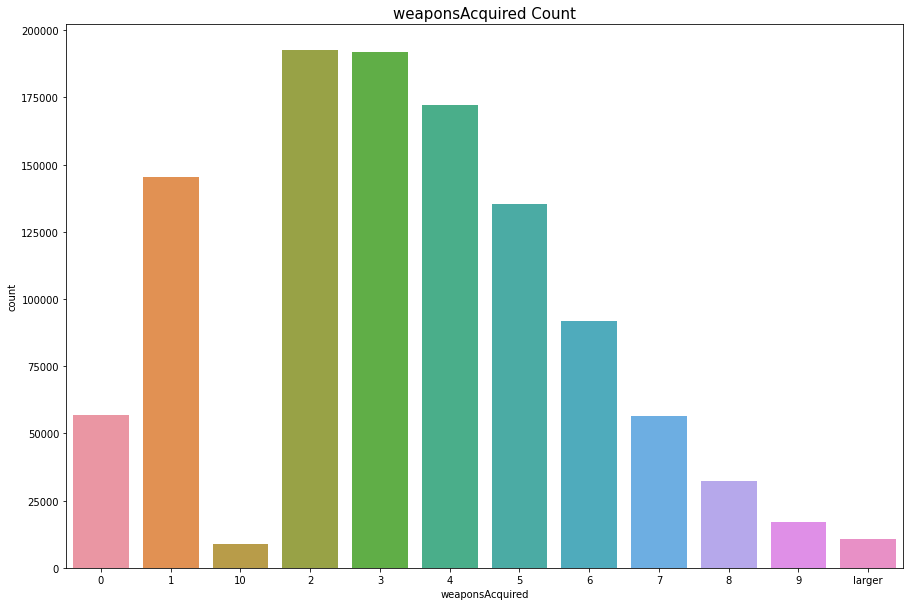

In [19]:
df2 = data.copy()  #df2 is a copy of data to avoid modifying the value of df2
#The number of kills greater than 7 is attributed to larger
df2.loc[df2['weaponsAcquired'] > df2['weaponsAcquired'].quantile(0.99)] = 'larger'
#Drawing, take kills as the abscissa, and the number of df2 as the ordinate
plt.figure(figsize=(15,10))
sns.countplot(df2['weaponsAcquired'].astype('str').sort_values())
plt.title("weaponsAcquired Count",fontsize=15)
plt.show()

**Most people get 1 to 4 weapons per round**

## **Beneficial and therapeutic items**

In [20]:
average_heals=data['heals'].mean()
quantile_099_heals=data['heals'].quantile(0.99)
print("The average number of therapeutic materials used per person is: {:.1f}, 99% of people use less than:.{}".format(average_heals, quantile_099_heals))
average_boosts=data['boosts'].mean()
quantile_099_boosts=data['boosts'].quantile(0.99)
print("The average number of supplementary materials used per person is: {:.1f}, 99% of the people use less than:.{}".format(average_boosts, quantile_099_boosts))

The average number of therapeutic materials used per person is: 1.4, 99% of people use less than:.12.0
The average number of supplementary materials used per person is: 1.1, 99% of the people use less than:.7.0


## **Vehicle Usage**

In [21]:
#@title
def plot_hist(df, variable):
    plt.figure(figsize = (10,5))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Quantity (million)")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

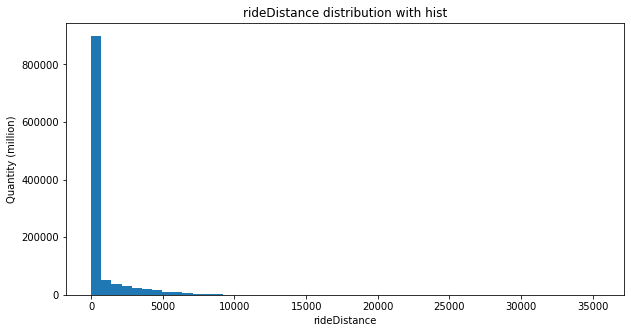

In [22]:
plot_hist(data, "rideDistance")

In [23]:
print("{:.2f}% of the players did not drive.".format(len(df[df.rideDistance == 0])/len(df) * 100.0))


74.05% of the players did not drive.


## **DBNO's**

<function matplotlib.pyplot.show>

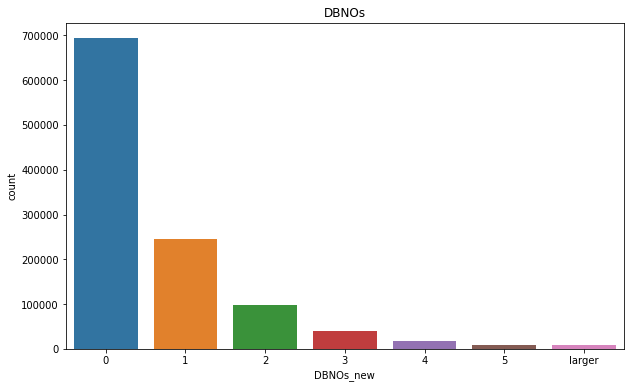

In [24]:
data['DBNOs_new'] = data['DBNOs']
data.loc[data['DBNOs_new'] > data['DBNOs_new'].quantile(0.99)] = 'larger'
plt.figure(figsize = (10,6))
sns.countplot(data['DBNOs_new'].astype('str').sort_values());
plt.title('DBNOs')
plt.show

**It can be seen that most players knock down the enemy with 0**

#  Bivariate Analysis

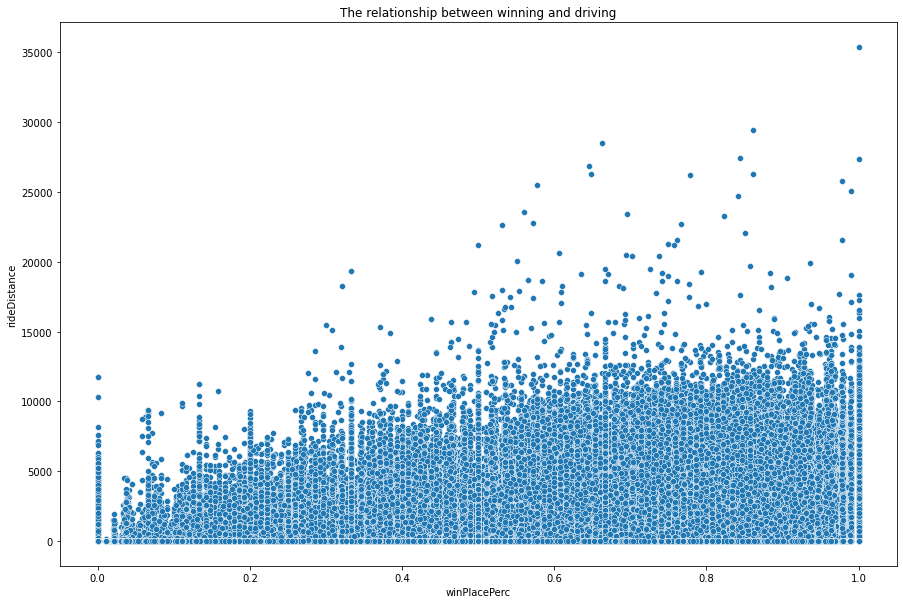

In [72]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='winPlacePerc',y='rideDistance',data=data)
plt.title('The relationship between winning and driving');

**So vehicles and winning are less correlated, but there’s a pubg trick that u can kill another player if you shoot at his car or throw a bomb at it to explode. let’s check that**


---



---



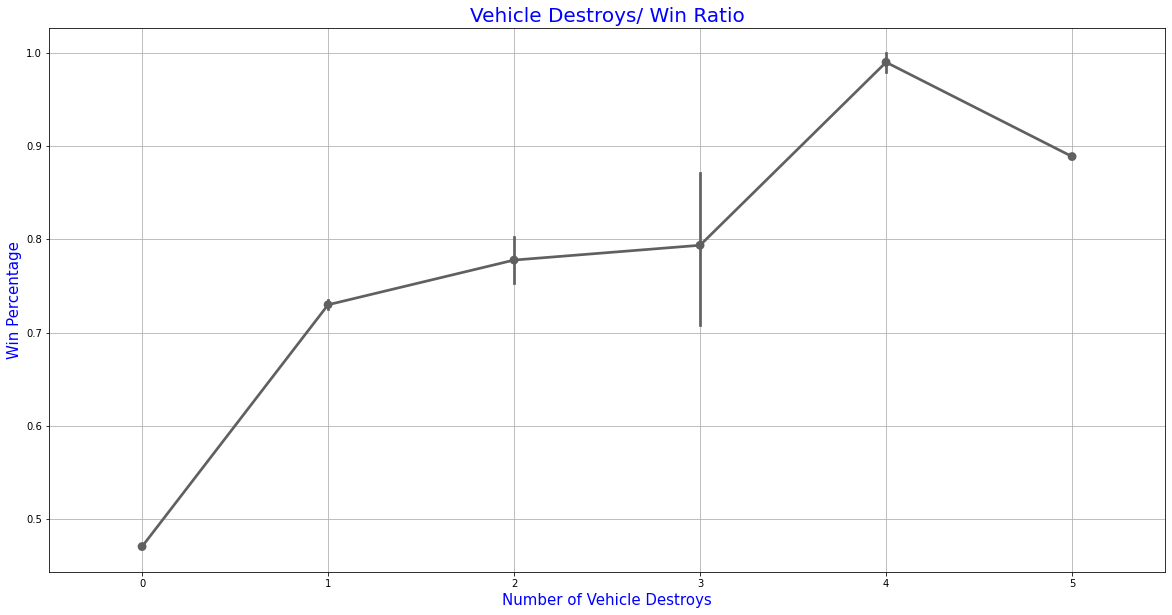

In [73]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid();

**The point plot shows that destroying at least one vehicle increases the chance of winning by ~35%, AWESOME!!**

---



---



<Figure size 1080x720 with 0 Axes>

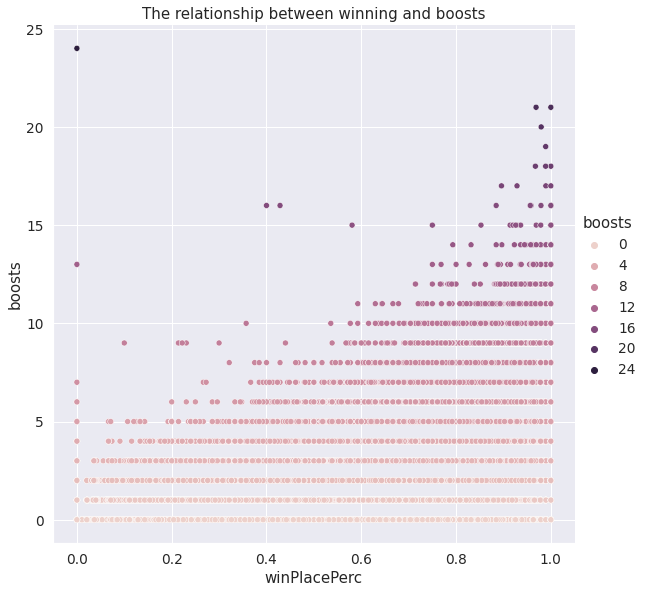

In [33]:
plt.figure(figsize=(15,10))
sns.relplot(x="winPlacePerc", y="boosts", data=data,hue="boosts" ,height=8)
plt.title('The relationship between winning and boosts');
plt.show()

#  Multivariate Analysis

**Game Travel Attributes**


*   walkDistance - Total distance traveled on foot measured in meters.
*   rideDistance - Total distance traveled in vehicles measured in meters.
*   swimDistance - Total distance traveled by swimming measured in meters.

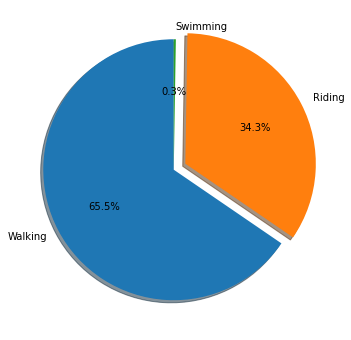

In [8]:
travel_values=data[['walkDistance','rideDistance','swimDistance']].sum()
plt.figure(figsize=(12,6))
plt.pie(travel_values, explode=[0,0.1,0],
        labels=['Walking','Riding','Swimming'], autopct='%1.1f%%',startangle=90,shadow=True);

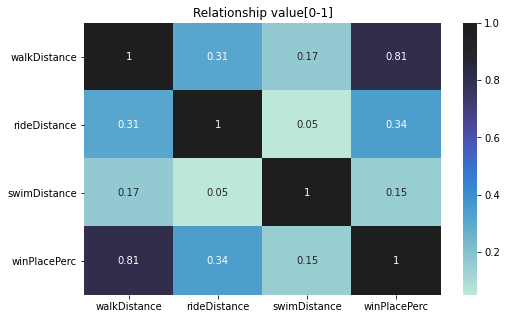

In [12]:
plt.subplots(1,1,figsize=(8,5))
plt.subplot(1,1,1,title='Relationship value[0-1]')
ax1=sns.heatmap(data[['walkDistance','rideDistance','swimDistance','winPlacePerc']].corr(),annot=True,center=True)

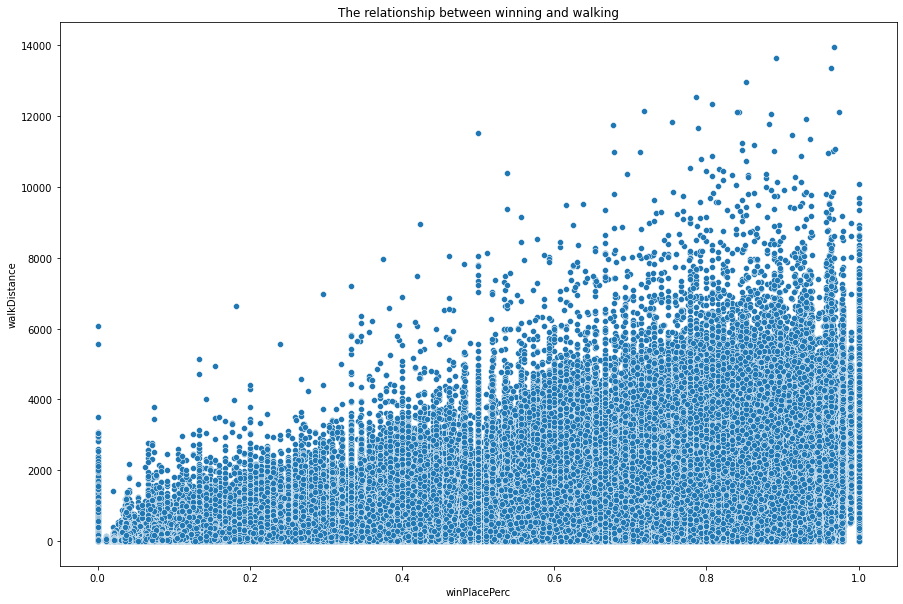

In [11]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='winPlacePerc',y='walkDistance',data=data)
plt.title('The relationship between winning and walking');

**From above three plots we can say that walking distance and winning probability are coreleated**


---
**OfCourse in game we have to relocate ourself in game to be in a safe zone**


---



---



**Game Life Attributes**

*  boosts - Number of boost items used.
*  heals - Number of healing items used.
*  revives - Number of times this player revived teammates.
*  DBNOs(Dead But Not Out) - Number of enemy players knocked

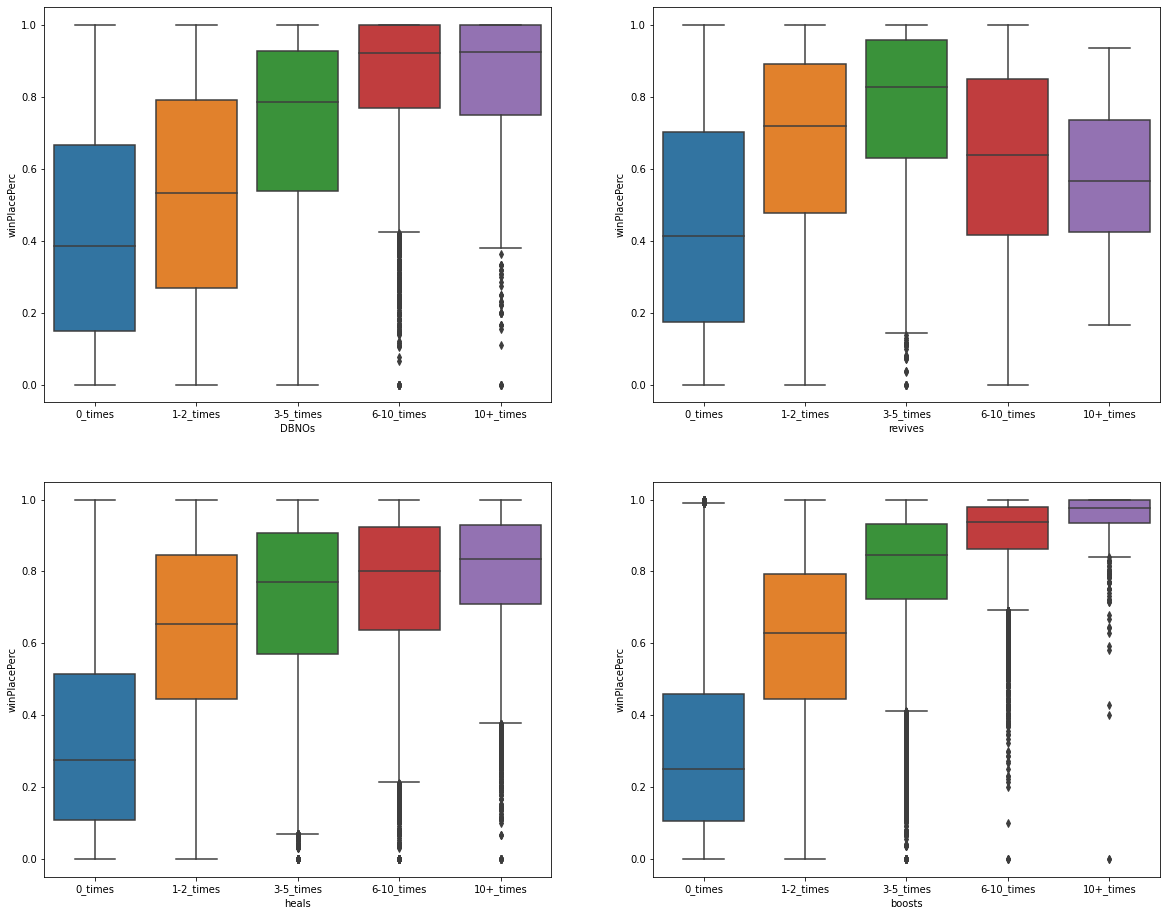

In [14]:
plt.subplots(2,2,figsize=(20,16))

plt.subplot(2,2,1)
DBNOS = pd.cut(data['DBNOs'], [-1, 0, 2, 5, 10, 60], 
               labels=['0_times','1-2_times', '3-5_times', '6-10_times', '10+_times'])

ax1=sns.boxplot(DBNOS,data['winPlacePerc'])

plt.subplot(2,2,2)
Revives = pd.cut(data['revives'], [-1, 0, 2, 5, 10, 60], 
               labels=['0_times','1-2_times', '3-5_times', '6-10_times', '10+_times'])

sns.boxplot(Revives,data['winPlacePerc'])

plt.subplot(2,2,3)
Heals = pd.cut(data['heals'], [-1, 0, 2, 5, 10, 60], 
               labels=['0_times','1-2_times', '3-5_times', '6-10_times', '10+_times'])

sns.boxplot(Heals,data['winPlacePerc'])

plt.subplot(2,2,4)
Boosts = pd.cut(data['boosts'], [-1, 0, 2, 5, 10, 60], 
               labels=['0_times','1-2_times', '3-5_times', '6-10_times', '10+_times'])

sns.boxplot(Boosts,data['winPlacePerc']);

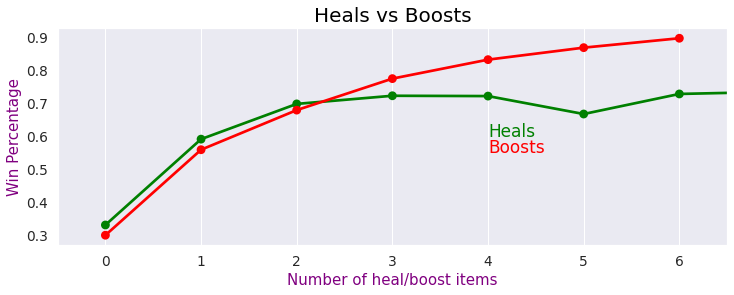

In [35]:
df4 = data.copy()
df4 = df4[df4['heals'] < df4['heals'].quantile(0.99)]
df4 = df4[df4['boosts'] < df4['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(12,4))
sns.pointplot(x='heals',y='winPlacePerc',data=df4,color='green',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=df4,color='red',alpha=0.8)

plt.text(4,0.55,'Boosts',color='red',fontsize = 17)
plt.text(4,0.6,'Heals',color='green',fontsize = 17)

plt.xlabel('Number of heal/boost items',fontsize = 15,color='purple')
plt.ylabel('Win Percentage',fontsize = 15,color='purple')
plt.title('Heals vs Boosts',fontsize = 20,color='black')
plt.grid()
plt.show()

*   DBNOs,boosts and heals are having similar charactereistics(increases the winning % with increase in itself ).
*   3-5 times revived player is always having more winning percentage.
---


**Battle achievement attributes**
*  longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
*  killStreaks - Max number of enemy players killed in a short amount of time.
*  killPlace - Ranking in match of number of enemy players killed.

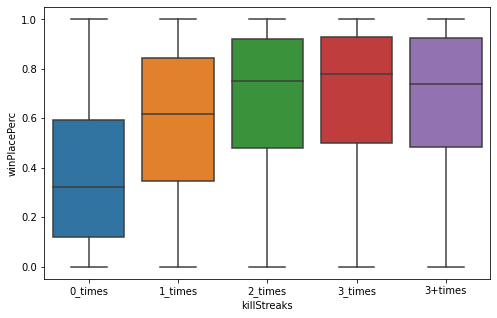

In [15]:
plt.subplots(1,1,figsize=(8,5))

plt.subplot(1,1,1)
Kill_streak = pd.cut(data['killStreaks'], [-1, 0, 1, 2, 3,10], 
               labels=['0_times','1_times', '2_times', '3_times','3+times'])

ax1=sns.boxplot(Kill_streak,data['winPlacePerc'])

**Repeatedly killing the enemy in short period of time will increase the winning percentage(%).**


---



---



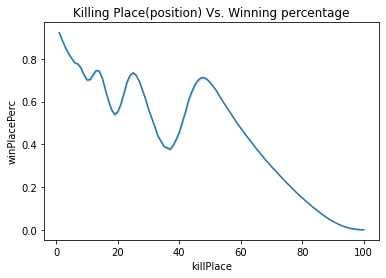

In [16]:
plt.title('Killing Place(position) Vs. Winning percentage')
sns.lineplot(data['killPlace'],data['winPlacePerc'])

**Top Rank(position) player will always have high winning percentage(%).**


---



---



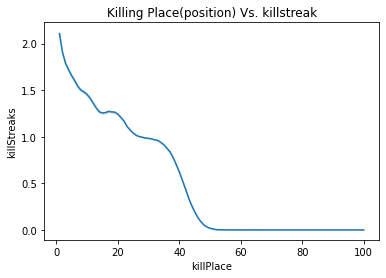

In [18]:
plt.title('Killing Place(position) Vs. killstreak')
sns.lineplot(data['killPlace'],data['killStreaks']);

**Player quickly killing the enemy will always be at top position.**


---



---



**Game kill Attributes**
* headshotKills - Number of enemy players killed with headshots.
* kills - Number of enemy players killed.
* roadKills - Number of kills while in a vehicle.
* teamKills - Number of times this player killed a teammate.

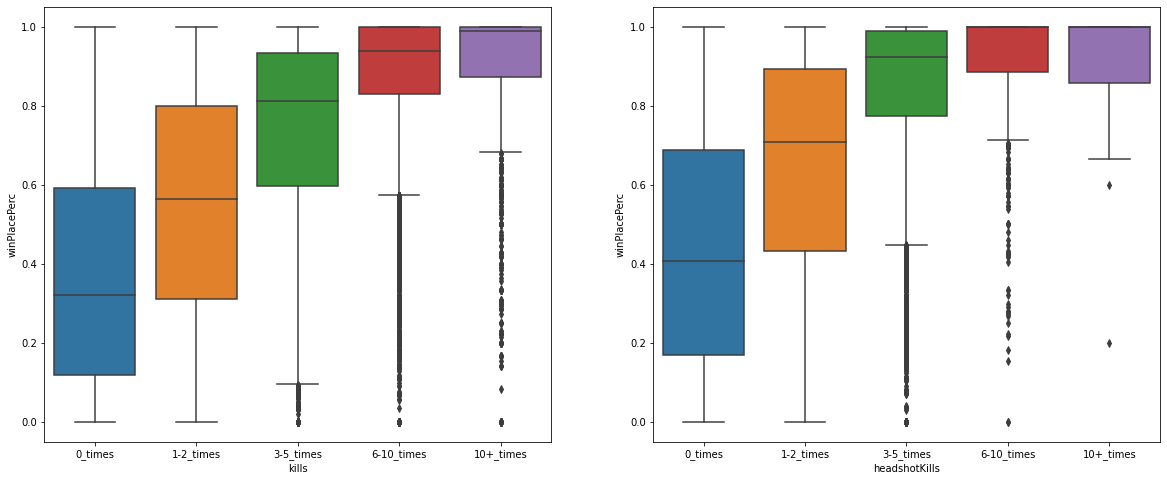

In [20]:
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)
Kills = pd.cut(data['kills'], [-1, 0, 2, 5, 10, 60], 
               labels=['0_times','1-2_times', '3-5_times', '6-10_times', '10+_times'])

ax1=sns.boxplot(Kills,data['winPlacePerc'])

plt.subplot(1,2,2)
Headshot = pd.cut(data['headshotKills'], [-1, 0, 2, 5, 10, 60], 
               labels=['0_times','1-2_times', '3-5_times', '6-10_times', '10+_times'])

sns.boxplot(Headshot,data['winPlacePerc']);

**Instead of killing normal,headshot will slightly increase the winning percentage(%).**


---



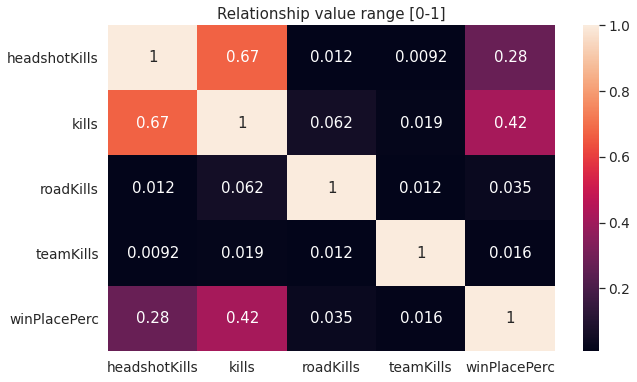

In [26]:
plt.subplots(1,1,figsize=(10,6))
plt.subplot(1,1,1,title='Relationship value range [0-1]')
ax1=sns.heatmap(data[['headshotKills','kills','roadKills','teamKills','winPlacePerc']].corr(),annot=True)

**Game Points Attributes:**
* rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
* winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
* killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
* numGroups - Number of groups we have data for in the match.


  ![picture](https://drive.google.com/uc?export=view&id=1VLXcSNAOAAgms2D4kQhknEItZLzMVHoS)


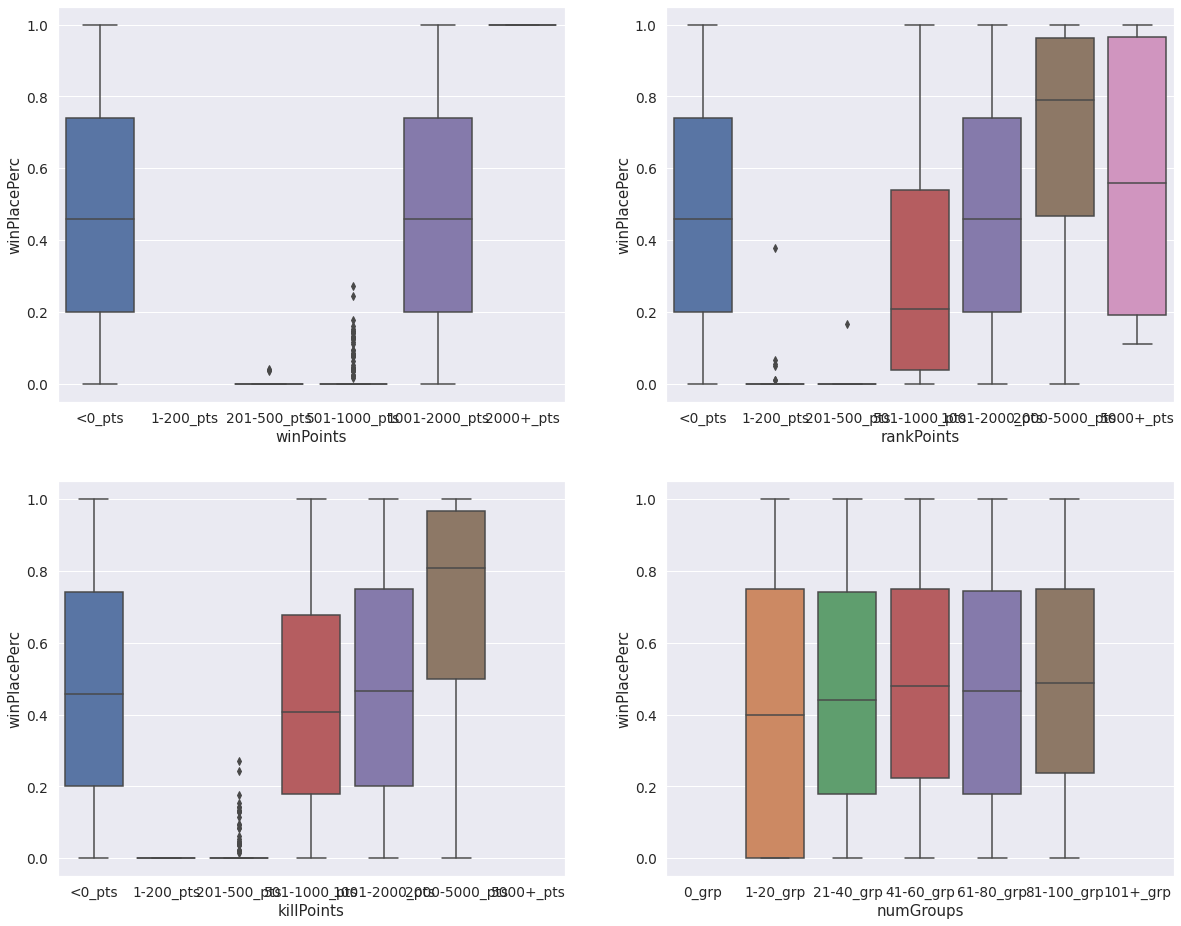

In [30]:
plt.subplots(2,2,figsize=(20,16))

plt.subplot(2,2,1)
winpt = pd.cut(data['winPoints'], [-1, 0, 200, 500, 1000, 2000,5000], 
               labels=['<0_pts','1-200_pts', '201-500_pts', '501-1000_pts', 
                       '1001-2000_pts','2000+_pts'])

ax1=sns.boxplot(winpt,data['winPlacePerc'])

plt.subplot(2,2,2)
rankpt = pd.cut(data['rankPoints'], [-1, 0, 200, 500, 1000, 2000,5000,10000], 
               labels=['<0_pts','1-200_pts', '201-500_pts', '501-1000_pts', 
                       '1001-2000_pts','2000-5000_pts','5000+_pts'])


sns.boxplot(rankpt,data['winPlacePerc'])

plt.subplot(2,2,3)
killpt = pd.cut(data['killPoints'], [-1, 0, 200, 500, 1000, 2000,5000,10000], 
               labels=['<0_pts','1-200_pts', '201-500_pts', '501-1000_pts', 
                       '1001-2000_pts','2000-5000_pts','5000+_pts'])

sns.boxplot(killpt,data['winPlacePerc'])

plt.subplot(2,2,4)
numgrp = pd.cut(data['numGroups'], [-1, 0, 20, 40, 60, 80,100,120], 
               labels=['0_grp','1-20_grp', '21-40_grp','41-60_grp','61-80_grp','81-100_grp',
                      '101+_grp'])

sns.boxplot(numgrp,data['winPlacePerc']);


* More than 2000 points in killing or ranking will have better change of winning.
* All number of groups will almost have same winning percentage(%).


---



---



## **Co-Relation Matrix**

---

There are many attributes that have little corr values with the target variable..let's choose the top 5 attributes and explore them further,it's also to be noticed that the least correlated feature is the kill place

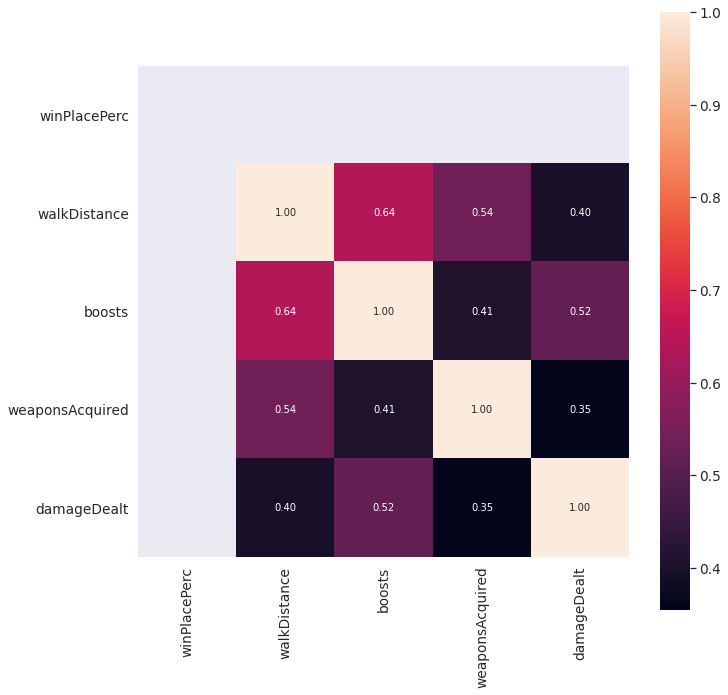

In [40]:
f,ax = plt.subplots(figsize=(11, 11))
cols = data.corr().nlargest(5, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**We notice that player’s weapons affect winning, which is true some weapons in PUBG are more powerful than others (I love M416)**

## **Analysis of TOP 10% of players**

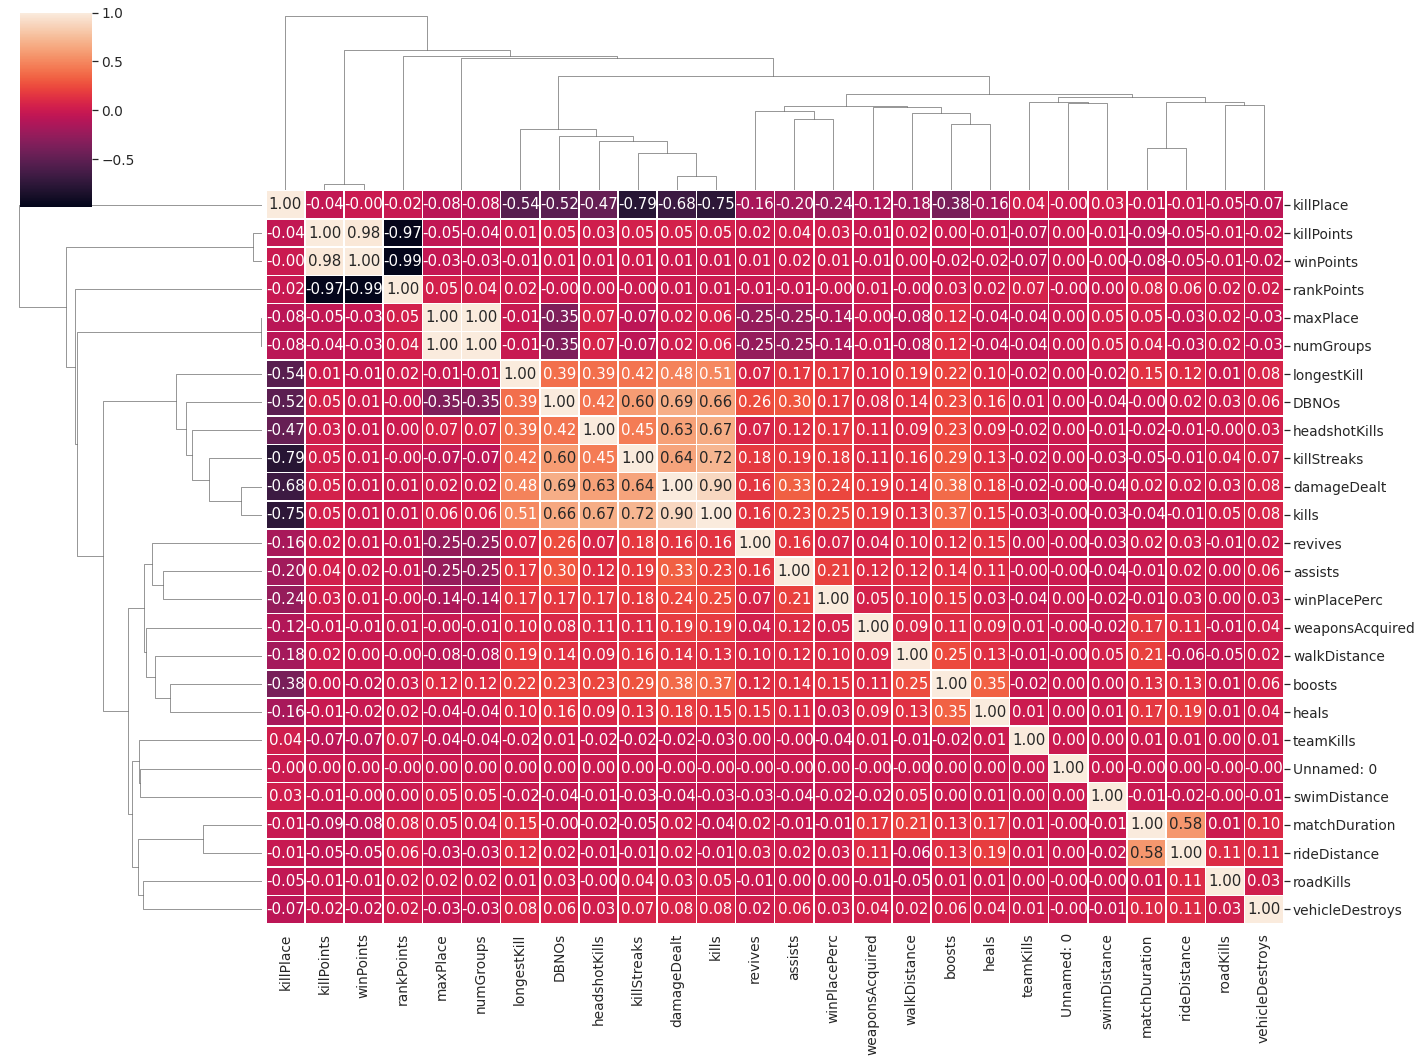

In [38]:
top10 = data[data["winPlacePerc"]>0.9]
ax = sns.clustermap(top10.corr(), annot=True, linewidths=.5, fmt= '.2f', figsize=(20, 15))
plt.show()

**Comparison of both clustertmap, for all and TOP 10% shows that the same columns seems to be of significant importance (I assume above 0.6 or below -0.6):**

* rankPoints vs killPoints
* kills vs. damage dealt/DBNOs/headshotKills/killPlace
* killStreaks vs. damageDealt/killPlace/kills
* longestKill vs. damageDealt/kills
* walkDistance vs. killPlace
* winPoints vs. killPonts/rankPoints
* winPlacePerc vs. boosts/killPlace/walkDistance/weaponsAquired

 ![picture](https://drive.google.com/uc?export=view&id=1G2Lw5YkwOMpxHFxQ1grqPb2xaekJN81l)

